In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# we know from the webiste link provided "https://archive.ics.uci.edu/ml/datasets/iris" there are no
# missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [4]:
# From the info it is confirmed none of the value are missing
# 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [6]:
#Finding the mean of sepal lenght and width and petal lenght and width of each of the species 
df.groupby('species').mean() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
#Finding the standard deviation of sepal lenght and width and petal lenght and width of each of the species 
df.groupby('species').std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


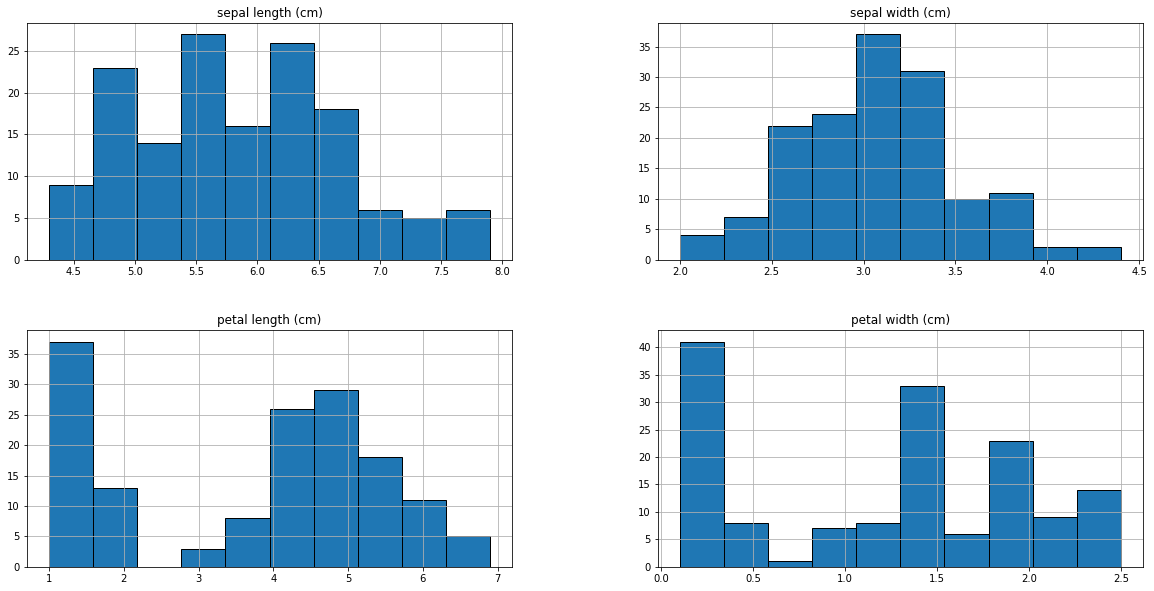

In [8]:
#Checking how the width and length are distributed of sepal and petal for every category
df.hist(edgecolor = "black")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

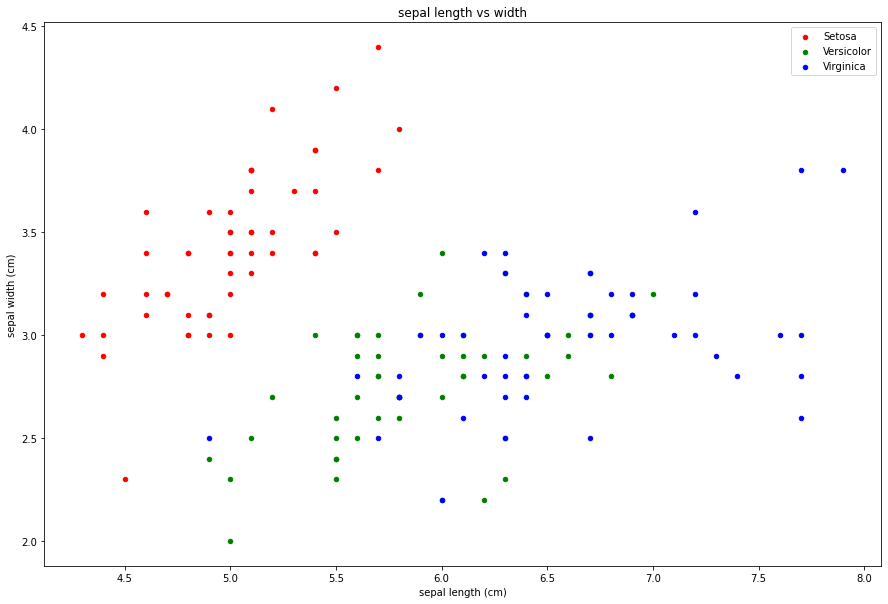

In [9]:
fig2 = df[df.species == "setosa"].plot(kind = "scatter", x = "sepal length (cm)", y = "sepal width (cm)", color = "red", label = "Setosa")
df[df.species == "versicolor"].plot(kind = "scatter", x = "sepal length (cm)", y = "sepal width (cm)", color = "green", label = "Versicolor", ax = fig2)
df[df.species == "virginica"].plot(kind = "scatter", x = "sepal length (cm)", y = "sepal width (cm)", color = "blue", label = "Virginica", ax = fig2)
fig2.set_title("sepal length vs width")
fig2 = plt.gcf()
fig2.set_size_inches(15,10)
plt.show()

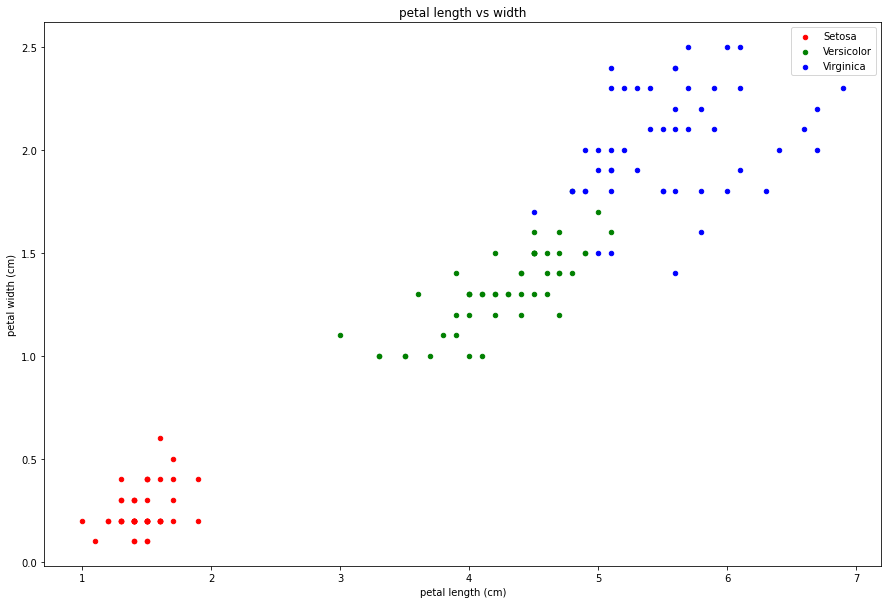

In [10]:
fig3 = df[df.species == "setosa"].plot(kind = "scatter", x = "petal length (cm)", y = "petal width (cm)", color = "red", label = "Setosa")
df[df.species == "versicolor"].plot(kind = "scatter", x = "petal length (cm)", y = "petal width (cm)", color = "green", label = "Versicolor", ax = fig3)
df[df.species == "virginica"].plot(kind = "scatter", x = "petal length (cm)", y = "petal width (cm)", color = "blue", label = "Virginica", ax = fig3)
fig3.set_title("petal length vs width")
fig3 = plt.gcf()
fig3.set_size_inches(15,10)
plt.show()

In [11]:
df.shape

(150, 5)

In [13]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"] #Needed features in plot
scaled_features = scaling.fit_transform(df[features]) #Scaling 
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) #creating new matrix with scalling
df_feat.head()


In [14]:
target_feature = df["species"].astype('category')
target_feature.dtypes
target_feature = target_feature.cat.codes


In [15]:
from sklearn.model_selection import train_test_split
X = df_feat
y = target_feature

train_X, test_X, train_y, test_y  = train_test_split(X,y, test_size = 0.3) # Splitting the data in 70 and 30 ratio
#Divided data set in two pieces -> Train = 70% and test = 30%

In [16]:
from sklearn.svm import SVC # for Support vector machine algo
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn import metrics # for checking model accuracy


In [18]:
#SVM
#Before hyperparameter
svmmodel = SVC(kernel = 'linear', C = 10)
svmmodel.fit(train_X,train_y)
prediction = svmmodel.predict(test_X)
print("accuracy -> ", metrics.accuracy_score(prediction, test_y))

accuracy ->  0.9555555555555556


In [19]:
mse = mean_squared_error(test_y, prediction)
print("Mean squared error -> ", mse)
rmse = sqrt(mse)
print("Root mean square error -> ", rmse)

Mean squared error ->  0.044444444444444446
Root mean square error ->  0.21081851067789195


In [21]:
svmmodel = SVC(kernel = 'rbf')
svmmodel.fit(train_X,train_y)
prediction = svmmodel.predict(test_X)
print("accuracy -> ", metrics.accuracy_score(prediction, test_y))

accuracy ->  0.9777777777777777


In [22]:
#After hyperparameter
C = [0.1,1,10,100]
gamma = [1, 0.1,0.01,0.001]
param_grid = {"C":C,"gamma":gamma,"kernel":["linear","rbf"]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(test_X,test_y);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.7s finished


In [23]:
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [24]:
grid_prediction = grid.predict(test_X)#Hyperparameter prediction
print("accuracy for grid-> ", metrics.accuracy_score(grid_prediction,test_y))

accuracy for grid->  1.0


In [25]:
#KNN

k_range = list(range(1,31))
knnmodel = KNeighborsClassifier(n_neighbors = 9)
knnmodel.fit(train_X,train_y)
prediction = knnmodel.predict(test_X)
print("accuracy for k = 9 is -> ", metrics.accuracy_score(prediction, test_y))


accuracy for k = 9 is ->  0.9777777777777777


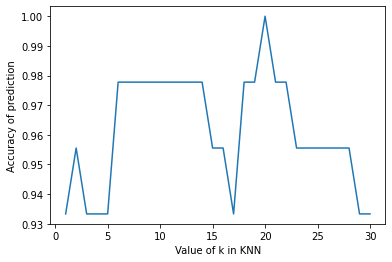

In [26]:
k_scores = []
for k in k_range:
  knnmodel = KNeighborsClassifier(n_neighbors=k)
  knnmodel.fit(train_X,train_y)
  prediction = knnmodel.predict(test_X)
  k_scores.append(pd.Series(metrics.accuracy_score(prediction, test_y)))

plt.plot(k_range, k_scores)
plt.xlabel("Value of k in KNN")
plt.ylabel("Accuracy of prediction")
plt.show()

In [27]:
options = ['uniform', 'distance']
param_dist = dict(n_neighbors = k_range, weights = options)
rand = RandomizedSearchCV(KNeighborsClassifier(), param_dist, cv= 4, scoring = "accuracy", n_iter = 10, random_state= 5)
rand.fit(train_X,train_y)
print("Best Score is -> ", rand.best_score_)
print("Best value of k is ->", rand.best_params_)

Best Score is ->  0.9615384615384617
Best value of k is -> {'weights': 'distance', 'n_neighbors': 10}
